In [8]:
import numpy as np
import h5py
from merger_clean import *
from merger_rate import *
import matplotlib.pyplot as plt
import camb 
import matplotlib as mpl
import csv
import os
import pandas as pd 
from astropy.cosmology import LambdaCDM, z_at_value
from astropy.io import ascii
from astropy.table import Table
from astropy import units as u
from scipy.optimize import curve_fit
params = {'legend.fontsize': 7,
          'legend.handlelength': 2}
mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['font.family'] = 'serif'
plt.rcParams.update(params)

## SIMULATIONS LIST AND FOLDER

In [3]:
old_path = '/home/painchess/disq2/ahf-v1.0-101/'
path = '/home/painchess/sims/'

sim_names = ['M25S07', 'M25S08', 'M25S09', 'M03S07','M03S08', 'M03S09', 'M35S07', 'M35S08', 'M35S09',
             'Illustris', 'bolshoiP', 'bolshoiW', 'M03S08b', 'm25s85', 'm2s8', 'm4s7', 'm4s8', 'm2s9',
             'm3s8_50', 'm3s8', 'm35s75', 'm4s9', 'm3s9', 'm25s75', 'm2s1']
omegas = [0.25, 0.25, 0.25, 0.3, 0.3, 0.3, 0.35, 0.35, 0.35, 0.309, 0.307, 0.27, 0.3, 0.25, 0.2, 0.4, 0.4, 0.2,  0.3
          ,0.3, 0.35, 0.4, 0.3, 0.25, 0.2]
sigmas = [0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.816, 0.82, 0.82, 0.8, 0.85, 0.8, 0.7, 0.8, 0.9, 0.8
          ,0.8, 0.75, 0.9, 0.9, 0.75, 1.0]

In [8]:
halos.keys()

Index(['#ID(1)', 'hostHalo(2)', 'numSubStruct(3)', 'Mhalo(4)', 'npart(5)',
       'Xc(6)', 'Yc(7)', 'Zc(8)', 'VXc(9)', 'VYc(10)', 'VZc(11)', 'Rhalo(12)',
       'Rmax(13)', 'r2(14)', 'mbp_offset(15)', 'com_offset(16)', 'Vmax(17)',
       'v_esc(18)', 'sigV(19)', 'lambda(20)', 'lambdaE(21)', 'Lx(22)',
       'Ly(23)', 'Lz(24)', 'b(25)', 'c(26)', 'Eax(27)', 'Eay(28)', 'Eaz(29)',
       'Ebx(30)', 'Eby(31)', 'Ebz(32)', 'Ecx(33)', 'Ecy(34)', 'Ecz(35)',
       'ovdens(36)', 'nbins(37)', 'fMhires(38)', 'Ekin(39)', 'Epot(40)',
       'SurfP(41)', 'Phi0(42)', 'cNFW(43)'],
      dtype='object')

## ALONG THE BANANA

-10
-5
-6
-12
-1


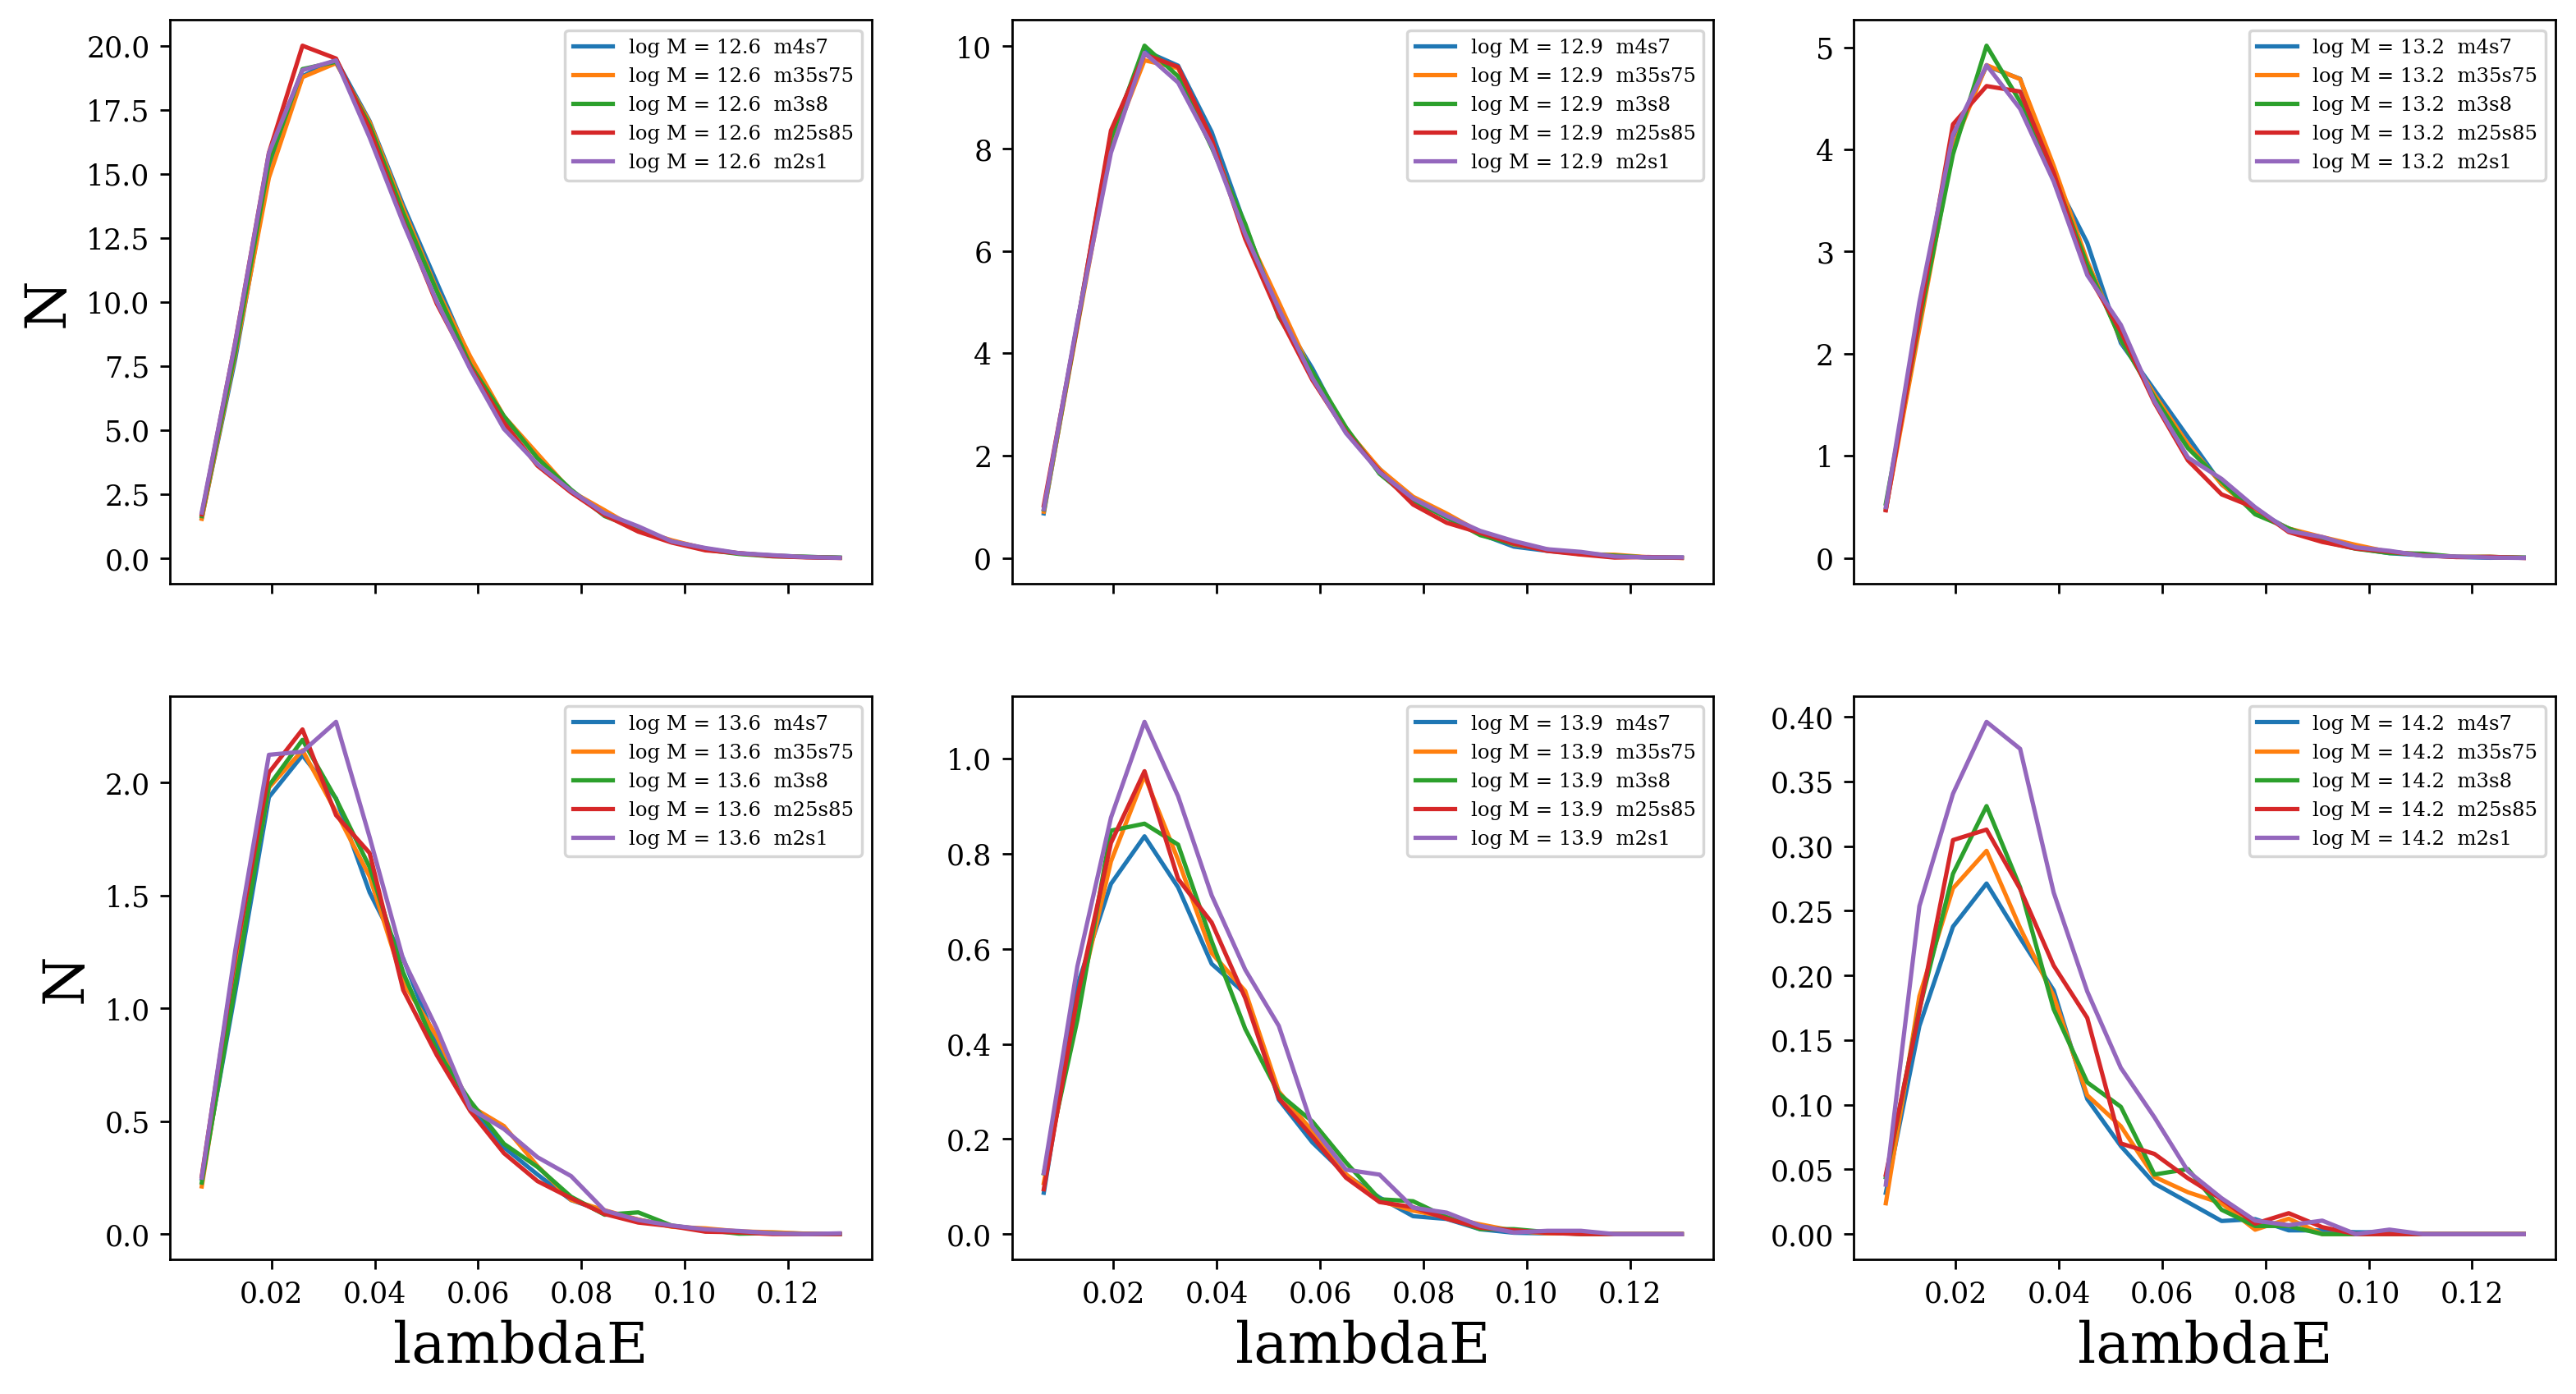

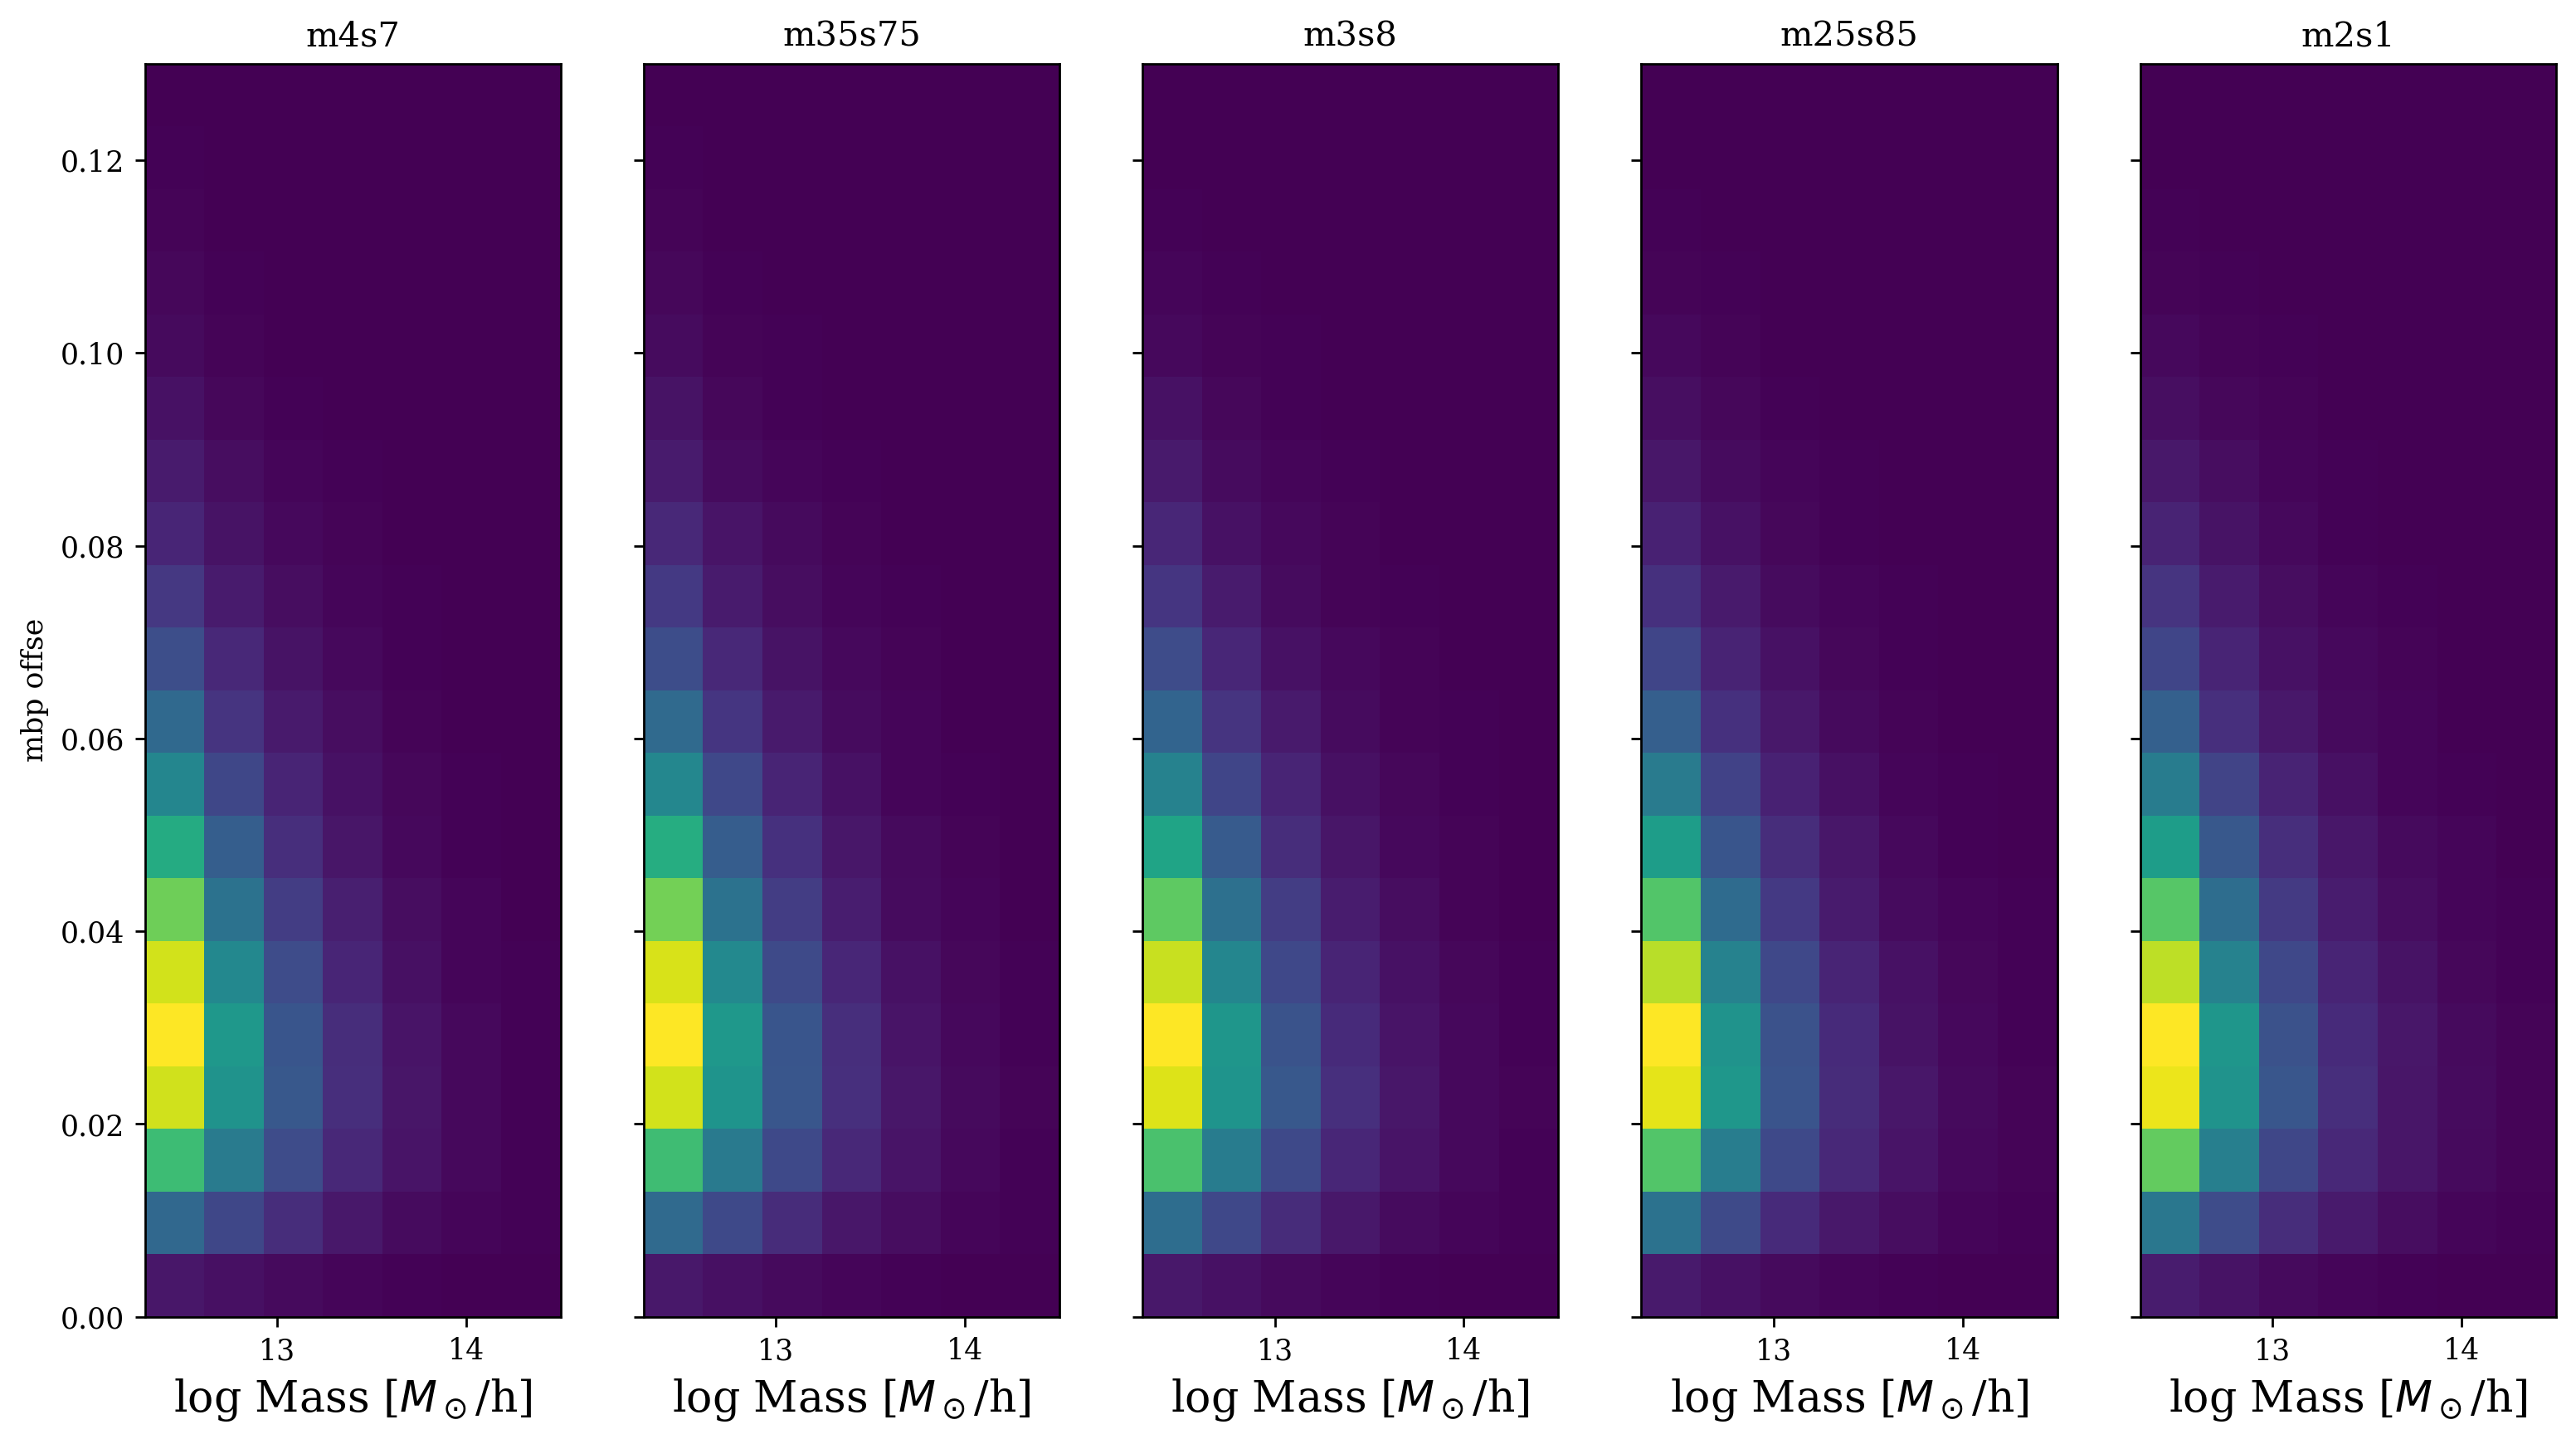

In [43]:
simselec = [-10, -5, -6, -12, -1]
nsims, nbins_m, nbins_c = len(simselec), 20, 7
prop = 'lambdaE(21)'

fig, axs = plt.subplots(2, 3, sharex=True, figsize=[15, 8])
fig2, axs2 = plt.subplots(1, nsims, sharey=True, figsize=[15, 8])
tosave = np.zeros((2,3,nsims,2,nbins_m))

colormaps = ['Greys', 'YlOrBr', 'Wistia']

for i, s in zip(range(nsims), simselec):
    print(s)
    sim1 = Simulation(sim_names[s], omegas[s], sigmas[s], path)
    halos = sim1.read_halos(snapshot=0)
    reds = sim1.get_redshifts()
    masses = halos['Mhalo(4)']
    str_prop = halos[prop]
    min_r, max_r = np.mean(str_prop) - 2*np.std(str_prop), np.mean(str_prop) + 2*np.std(str_prop)
    #h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), conc, cmap = cmp, range=[[np.log10(3*np.min(masses)), 14], [2.3, 14]], bins=80)
    h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), str_prop, range=[[12.3, 14.5], [0, 0.13]],density=True, bins=[nbins_c, nbins_m])

    axs2[i].set_title(sim_names[s])

    axs2[i].set_xlabel(r'log Mass [$M_\odot$/h]', size=15)
    axs2[i].set_ylabel('mbp offset'[:9*(i==0)])
    for k in range(1, 7):
        axs[(k-1)//3, (k-1)%3].plot(yedges[1:], h[k, :],  label='log M = {:2.1f}  '.format(xedges[k])+sim_names[s])
        tosave[(k-1)//3, (k-1)%3, i, :, :] = np.array([yedges[1:], h[k, :]])
        if i == nsims-1:
            axs[(k-1)//3, (k-1)%3].legend()
            if (k-1)%3 == 0:
                axs[(k-1)//3, (k-1)%3].set_ylabel('N', size=20)
            if (k-1)//3 == 1:
                axs[(k-1)//3, (k-1)%3].set_xlabel(prop[:-4], size=20)  
fig.savefig('./figs/{}_vs_cosmo_banana.png'.format(prop[:-4]), dpi=650, facecolor='white', transparent=False, bbox_inches='tight')
np.save('./data/{}_vs_cosmo_banana.npy'.format(prop[:-4]), tosave)

## $\Omega_m$ = 0.2

-1
-8
-11


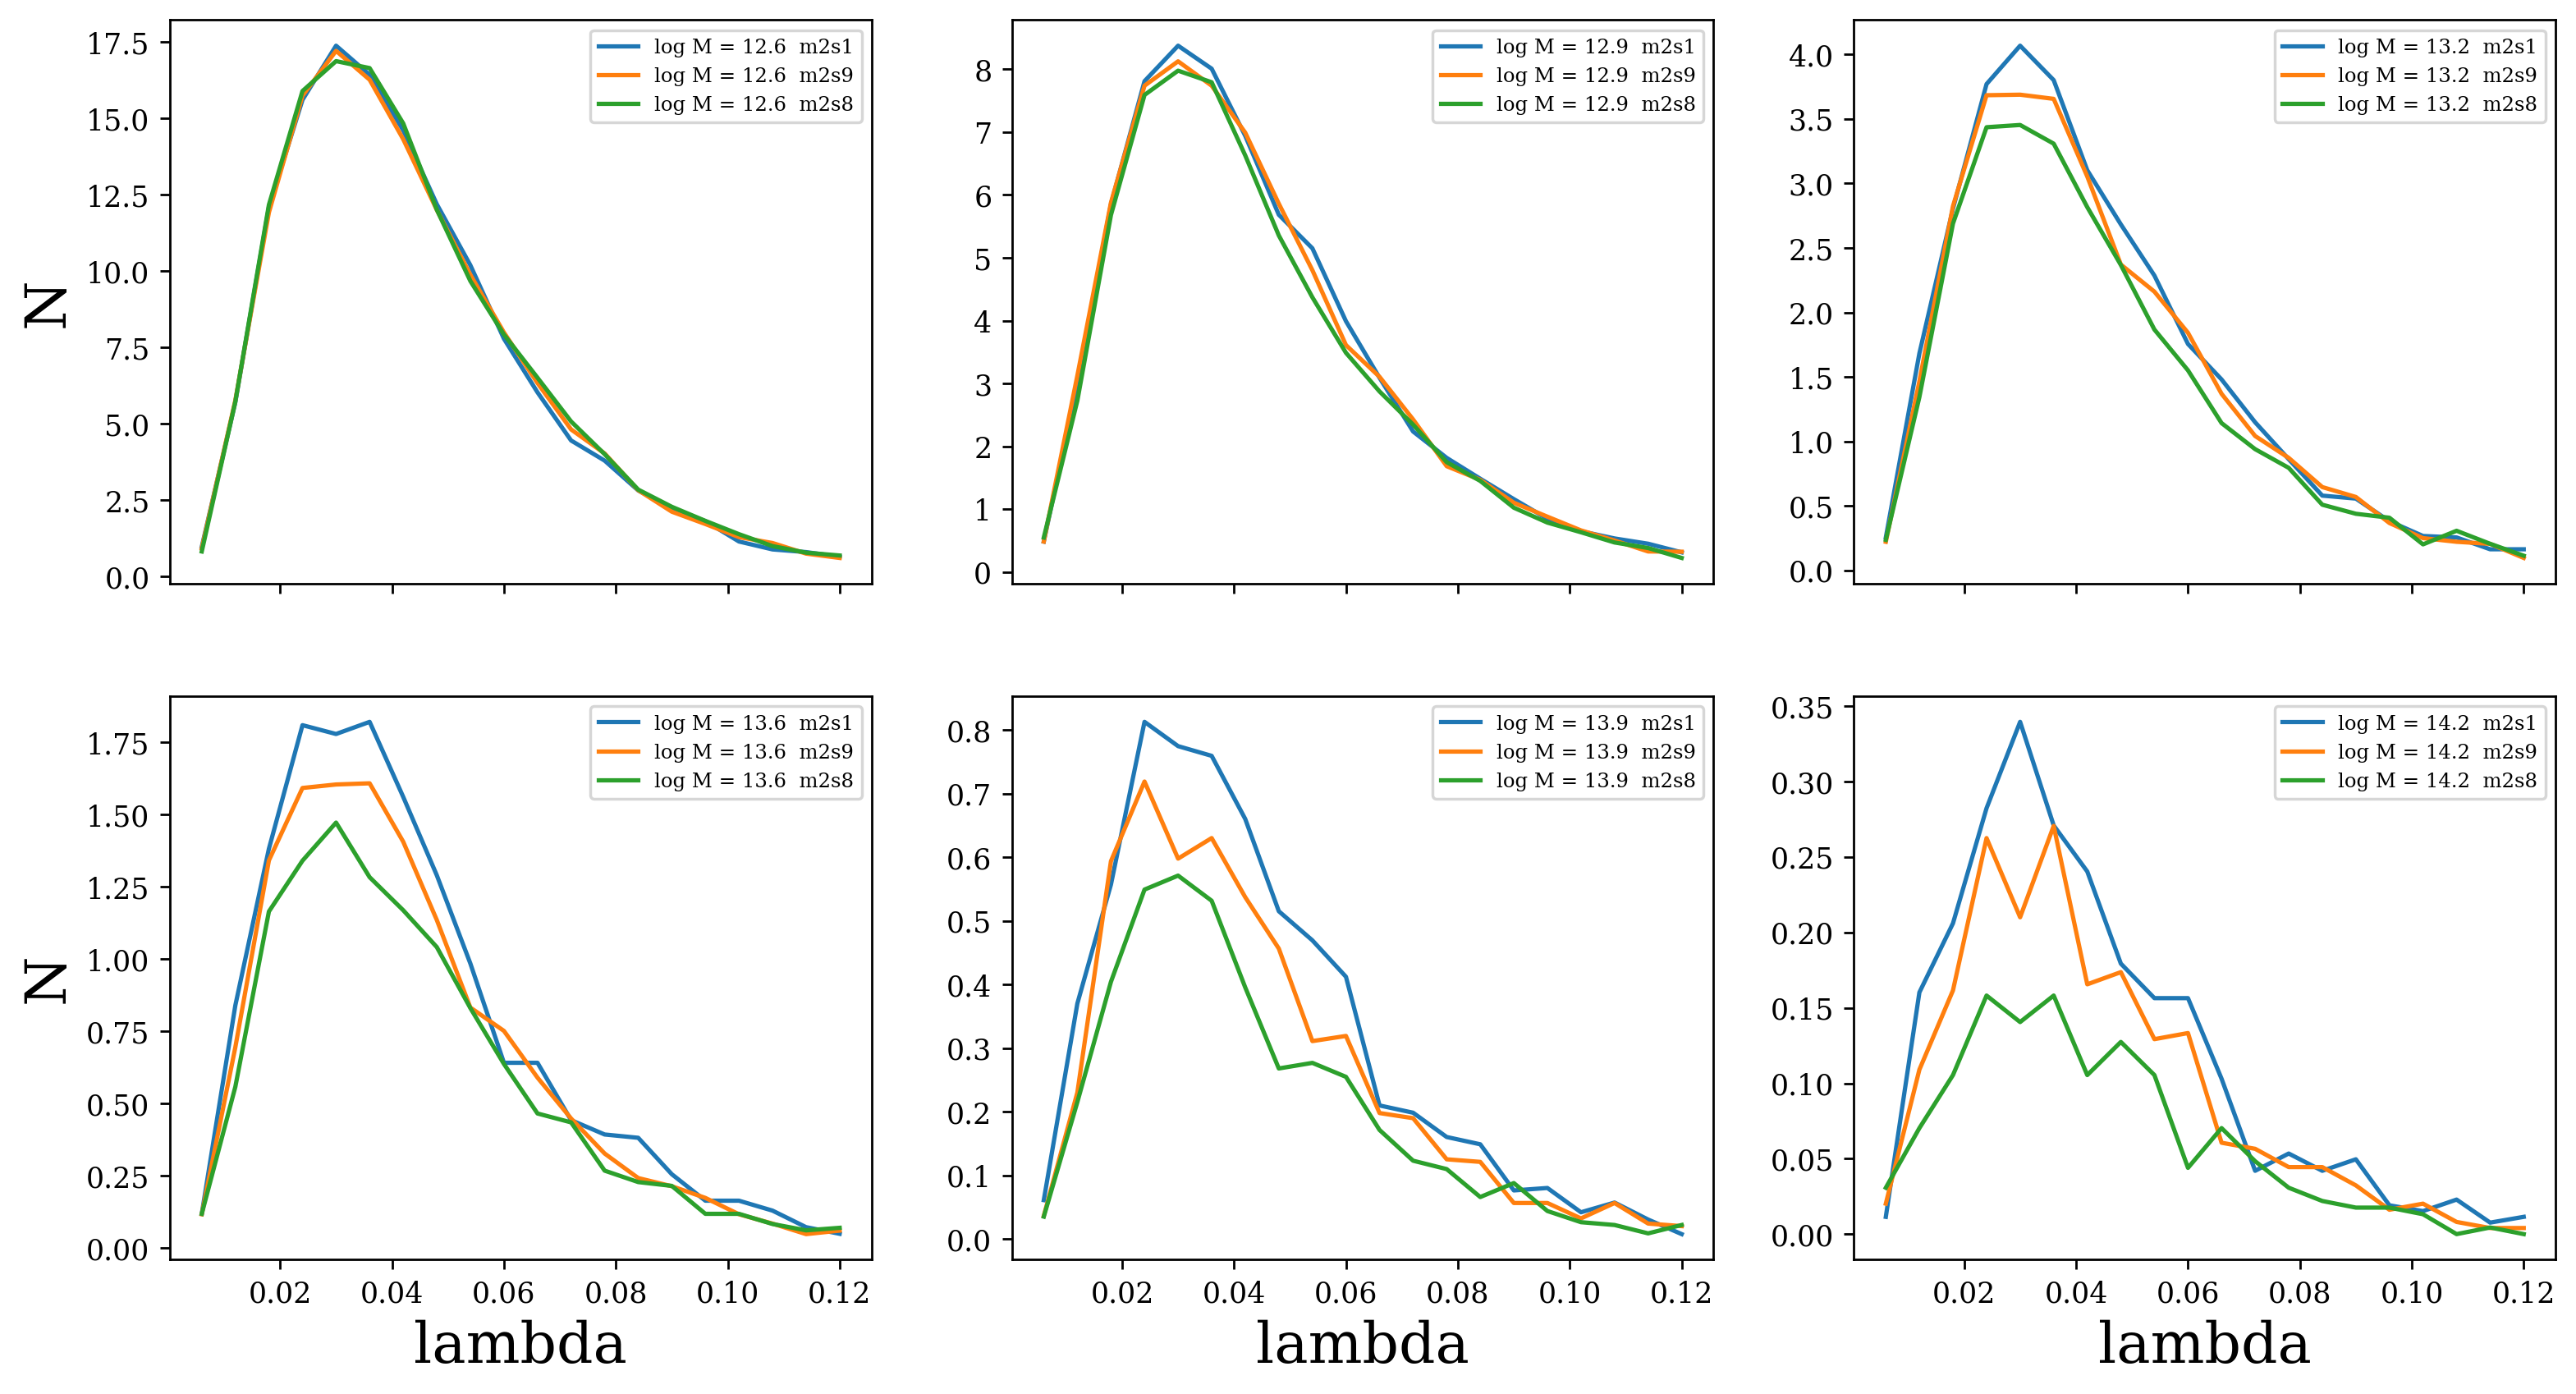

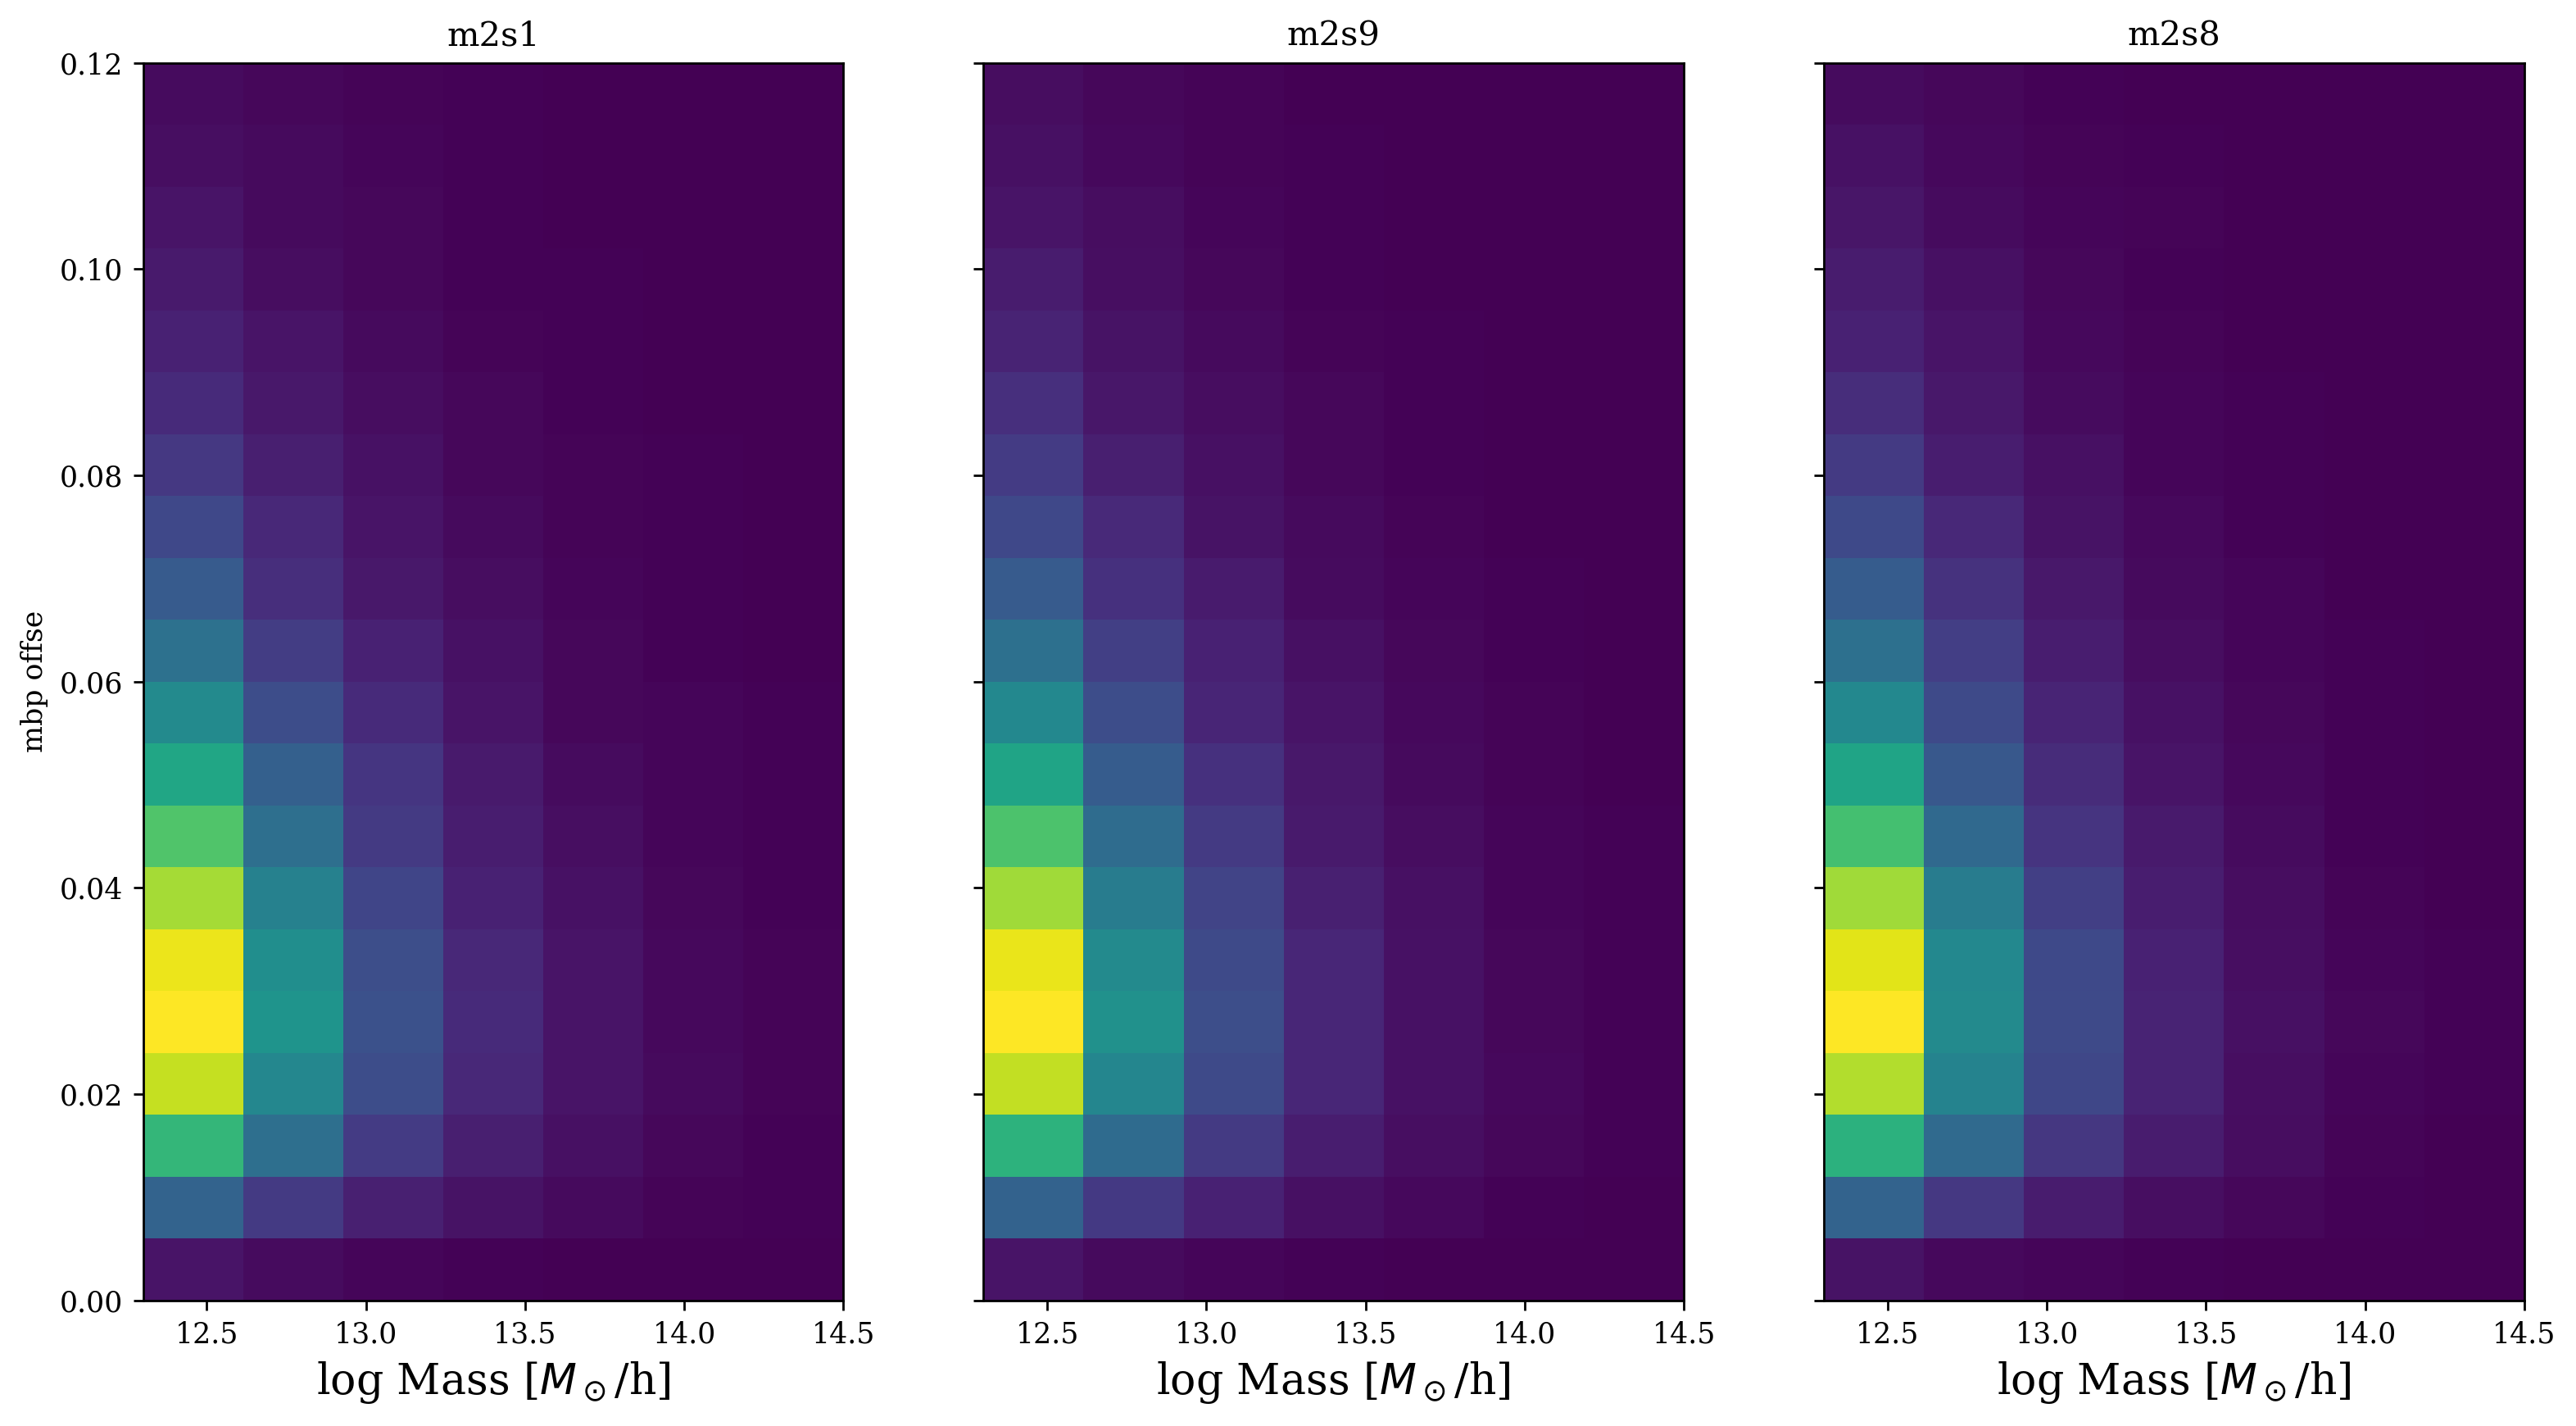

In [53]:
simselec = [-1, -8, -11]
nsims, nbins_m, nbins_c = len(simselec), 20, 7
prop = 'lambda(20)'

fig, axs = plt.subplots(2, 3, sharex=True, figsize=[15, 8])
fig2, axs2 = plt.subplots(1, nsims, sharey=True, figsize=[15, 8])
tosave = np.zeros((2,3,nsims,2,nbins_m))

colormaps = ['Greys', 'YlOrBr', 'Wistia']

for i, s in zip(range(nsims), simselec):
    print(s)
    sim1 = Simulation(sim_names[s], omegas[s], sigmas[s], path)
    halos = sim1.read_halos(snapshot=0)
    reds = sim1.get_redshifts()
    masses = halos['Mhalo(4)']
    str_prop = halos[prop]
    #min_r, max_r = np.mean(str_prop) - 2*np.std(str_prop), np.mean(str_prop) + 2*np.std(str_prop)
    #h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), conc, cmap = cmp, range=[[np.log10(3*np.min(masses)), 14], [2.3, 14]], bins=80)
    h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), str_prop, density=True, range=[[12.3, 14.5], [0, 0.12]], bins=[nbins_c, nbins_m])

    axs2[i].set_title(sim_names[s])

    axs2[i].set_xlabel(r'log Mass [$M_\odot$/h]', size=15)
    axs2[i].set_ylabel('mbp offset'[:9*(i==0)])
    for k in range(1, 7):
        axs[(k-1)//3, (k-1)%3].plot(yedges[1:], h[k, :],  label='log M = {:2.1f}  '.format(xedges[k])+sim_names[s])
        tosave[(k-1)//3, (k-1)%3, i, :, :] = np.array([yedges[1:], h[k, :]])
        if i == nsims-1:
            axs[(k-1)//3, (k-1)%3].legend()
            if (k-1)%3 == 0:
                axs[(k-1)//3, (k-1)%3].set_ylabel('N', size=20)
            if (k-1)//3 == 1:
                axs[(k-1)//3, (k-1)%3].set_xlabel(prop[:-4], size=20)  
fig.savefig('./figs/{}_vs_cosmo_om2.png'.format(prop[:-4]), dpi=650, facecolor='white', transparent=False, bbox_inches='tight')
np.save('./data/{}_vs_cosmo_om2.npy'.format(prop[:-4]), tosave)

## $\Omega_m$ = 0.4 

-4
-9
-10


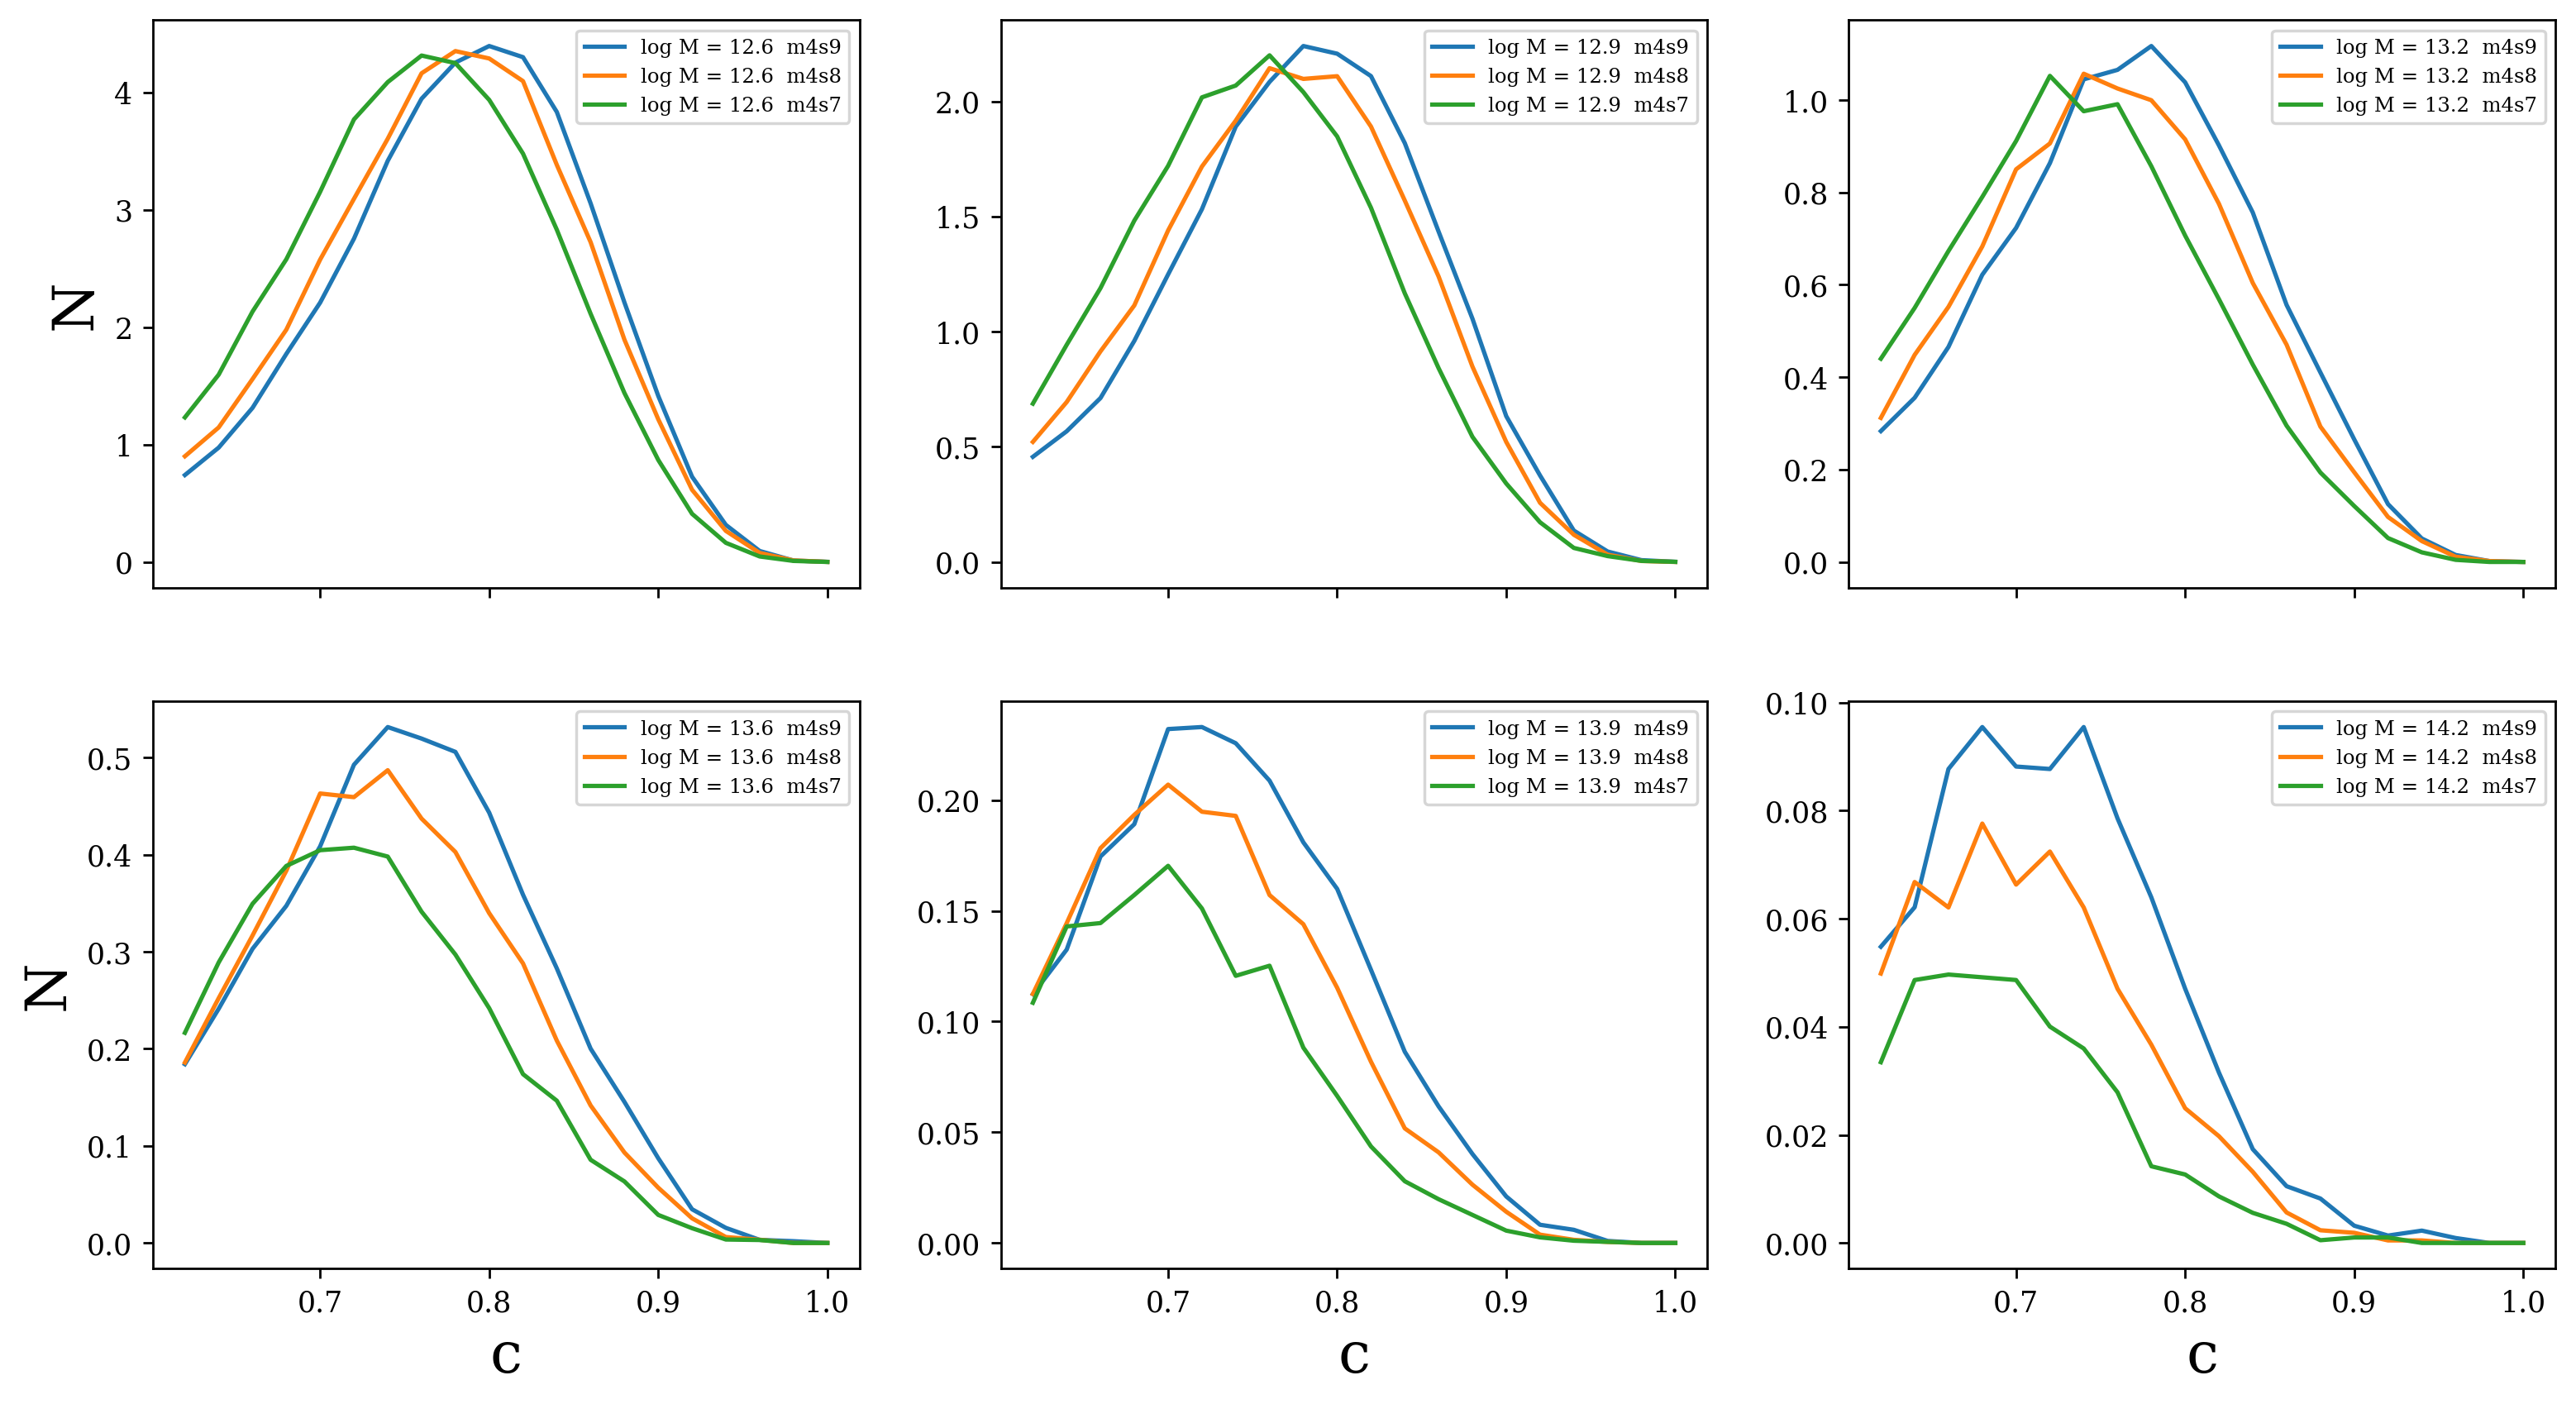

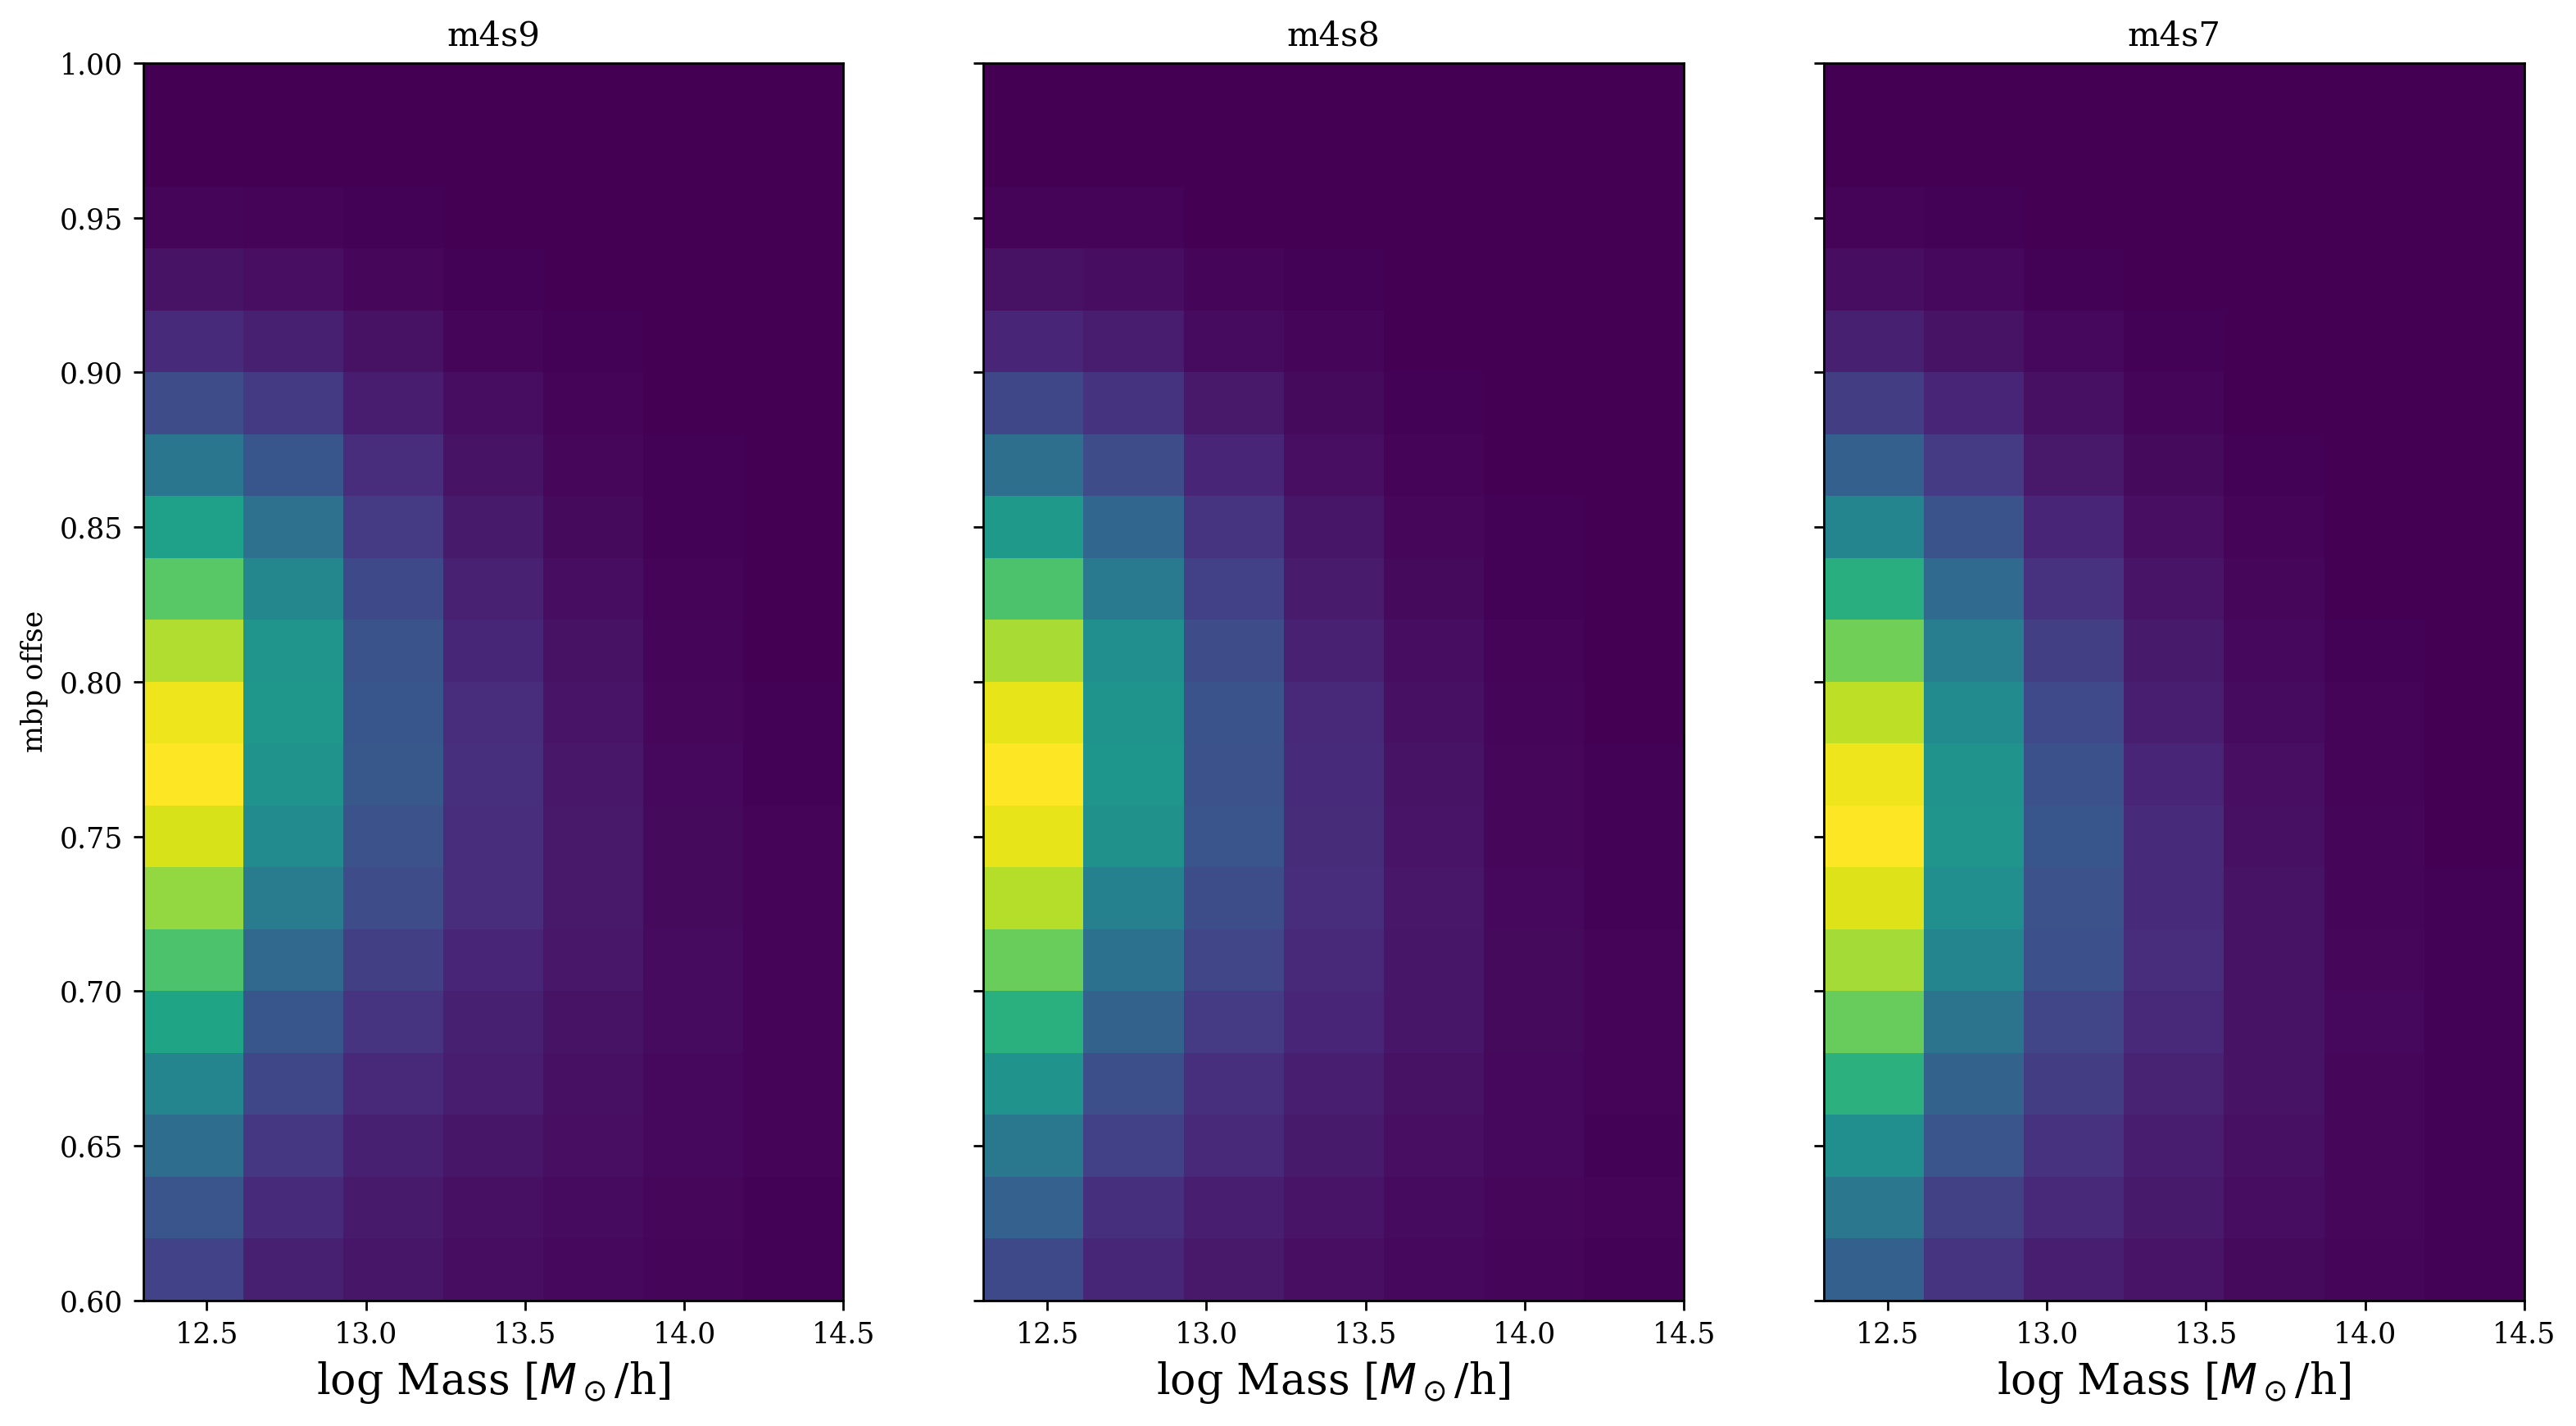

In [63]:
simselec = [-4, -9, -10]
nsims, nbins_m, nbins_c = len(simselec), 20, 7
prop = 'c(26)'

fig, axs = plt.subplots(2, 3, sharex=True, figsize=[15, 8])
fig2, axs2 = plt.subplots(1, nsims, sharey=True, figsize=[15, 8])
tosave = np.zeros((2,3,nsims,2,nbins_m))

colormaps = ['Greys', 'YlOrBr', 'Wistia']

for i, s in zip(range(nsims), simselec):
    print(s)
    sim1 = Simulation(sim_names[s], omegas[s], sigmas[s], path)
    halos = sim1.read_halos(snapshot=0)
    reds = sim1.get_redshifts()
    masses = halos['Mhalo(4)']
    str_prop = halos[prop]
    #min_r, max_r = np.mean(str_prop) - 2*np.std(str_prop), np.mean(str_prop) + 2*np.std(str_prop)
    #h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), conc, cmap = cmp, range=[[np.log10(3*np.min(masses)), 14], [2.3, 14]], bins=80)
    h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), str_prop, density=True, range=[[12.3, 14.5], [0.6, 1]], bins=[nbins_c, nbins_m])

    axs2[i].set_title(sim_names[s])

    axs2[i].set_xlabel(r'log Mass [$M_\odot$/h]', size=15)
    axs2[i].set_ylabel('mbp offset'[:9*(i==0)])
    for k in range(1, 7):
        axs[(k-1)//3, (k-1)%3].plot(yedges[1:], h[k, :],  label='log M = {:2.1f}  '.format(xedges[k])+sim_names[s])
        tosave[(k-1)//3, (k-1)%3, i, :, :] = np.array([yedges[1:], h[k, :]])
        if i == nsims-1:
            axs[(k-1)//3, (k-1)%3].legend()
            if (k-1)%3 == 0:
                axs[(k-1)//3, (k-1)%3].set_ylabel('N', size=20)
            if (k-1)//3 == 1:
                axs[(k-1)//3, (k-1)%3].set_xlabel(prop[:-4], size=20)  
fig.savefig('./figs/{}_vs_om4_banana.png'.format(prop[:-4]), dpi=650, facecolor='white', transparent=False, bbox_inches='tight')
np.save('./data/{}_vs_om4_banana.npy'.format(prop[:-4]), tosave)